# Make sure the switch box setting connect the ZCU216 to the quantum chip 
Switchs wiring diagram can be found at: <br>
https://docs.google.com/document/d/19PCMW-sWQP9IDaH1ihExrhLNKL3zvspGWfvfol0w36c/edit#

X4Y2: <br> switchbox.switchset('http://192.168.1.204','AB')

X4Y1: <br>
switchbox.switchset('http://192.168.1.204','BD')<br>
switchbox.switchset('http://192.168.1.215','CD')

In [3]:
pwd

'/home/xilinx/jupyter_notebooks/cal_repo_examples'

In [1]:
#import sys
#sys.path.append("../chipcalibration/chipcalibration")
#import switchbox
from chipcalibration import switchbox
switchbox.switchset('http://192.168.1.204','AB')

'b\'<HTML>\\r\\n<HEAD>\\r\\n<TITLE>RF Switch Box</TITLE>\\r\\n</HEAD>\\r\\n<BODY>\\r\\n<H1>RF Switch Box</H1>\\r\\n<hr />\\r\\n\\r\\n<B>Connected ports: A-B, C-D </B>\\r\\n<br>\\r\\n<input type=submit value="Toggle Switch" target=inlineframe style=width:200px;height:45px onClick=location.href=\\\'/?buttonToggle;\\\'>\\r\\n\\r\\n\\r\\n</BODY>\\r\\n</HTML>\\r\\n\''

In [8]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.ramsey as gordon
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg
import chipcalibration.rcal as rcal
import qubic.job_manager as jm

In [9]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}

In [13]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')
jobman = jm.JobManager(fpga_config, qchip, channel_config, runner)
runner.run_circuit_batch?

In [11]:
reload(rcal)
q='Q2'
drvqubit=['Q']
readqubits=['Q2','Q3']#,'Q4']
readqubits=['Q4']
drvqubit=[q]
readqubits=[q]
#readqubits=['Q3']
i_rcal = rcal.Rcal(drvqubit=drvqubit, readqubits=readqubits,
                   qchip=qchip, 
                   fpga_config=fpga_config, channel_configs=channel_config)


In [14]:
i_rcal.raw_asm_progs

[{'1': {'cmd_buf': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb0\xa0\xa8a\x00 \x86\x08\x08@\x00\x00\x02\x00\xf4\t\x90 \xcea\x00@\xfe\xff\t@\x00\x00\x02\x00\xf4\t\x90\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0',
   'env_buffers': [b'',
    b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x05\x00\x00\x00\x08\x00\x00\x00\x0b\x00\x00\x00\x0f\x00\x00\x00\x14\x00\x00\x00\x1a\x00\x00\x00 \x00\x00\x00\'\x00\x00\x00.\x00\x00\x006\x00\x00\x00?\x00\x00\x00H\x00\x00\x00R\x00\x00\x00]\x00\x00\x00h\x00\x00\x00t\x00\x00\x00\x81\x00\x00\x00\x8e\x00\x00\x00\x9c\x00\x00\x00\xaa\x00\x00\x00\xb9\x00\x00\x00\xc9\x00\x00\x00\xda\x00\x00\x00\xeb\x00\x00\x00\xfc\x00\x00\x00\x0f\x01\x00\x00"\x01\x00\x005\x01\x00\x00J\x01\x00\x00^\x01\x00\x00t\x01\x00\x00\x8a\x01\x00\x00\xa1\x01\x00\x00\xb8\x01\x00\x00\xd0\x01\x00\x00\xe9\x01\x00\x00\x02\x02\x00\x00\x1c\x02\x00\x007\x02\x00\x00R\x02\x00\x00n\x02\x00\x00\x8a\x02\x00\x00\xa7\x02\x00\x00\xc5\x02\x

In [12]:
i_rcal.run(runner, 1000)
print(i_rcal.prep0_read0)
print(i_rcal.prep0_read1)
print(i_rcal.prep1_read0)
print(i_rcal.prep1_read1)

Fault: <Fault 1: "<class 'KeyError'>:'3'">

In [109]:
compiled_rcal = tc.run_compile_stage(i_rcal.circuits, fpga_config, qchip)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling
done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


In [110]:
compiled_rcal[1].program

{('Q4.qdrv', 'Q4.rdrv', 'Q4.rdlo'): [{'op': 'phase_reset'},
  {'op': 'pulse',
   'freq': 5350927547.979777,
   'phase': 0.0,
   'amp': 0.2872115471046084,
   'env': {'env_func': 'cos_edge_square',
    'paradict': {'ramp_fraction': 0.25, 'twidth': 3.2e-08}},
   'start_time': 200005,
   'dest': 'Q4.qdrv'},
  {'op': 'pulse',
   'freq': 5350927547.979777,
   'phase': 0.0,
   'amp': 0.2872115471046084,
   'env': {'env_func': 'cos_edge_square',
    'paradict': {'ramp_fraction': 0.25, 'twidth': 3.2e-08}},
   'start_time': 200021,
   'dest': 'Q4.qdrv'},
  {'op': 'pulse',
   'freq': 6711440184.690463,
   'phase': 0.0,
   'amp': 0.016127662739686993,
   'env': {'env_func': 'cos_edge_square',
    'paradict': {'ramp_fraction': 0.25, 'twidth': 4e-06}},
   'start_time': 200037,
   'dest': 'Q4.rdrv'},
  {'op': 'pulse',
   'freq': 6711440184.690463,
   'phase': 3.624878768638384,
   'amp': 1.0,
   'env': {'env_func': 'square',
    'paradict': {'phase': 0.0, 'amplitude': 1.0, 'twidth': 4e-06}},
   'sta

In [111]:
debug

> /home/xilinx/software/qubic/run.py(226)run_circuit_batch()
    224             s11_i = self.run_circuit(n_total_shots, reads_per_shot, delay_per_shot)
    225             for ch in s11_i.keys():
--> 226                 s11[ch][i] = s11_i[ch]
    227 
    228         return s11

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


In [49]:
i_rcal.circuits

[[{'name': 'delay', 't': 0.0004}, {'name': 'read', 'qubit': ['Q3']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'X90', 'qubit': ['Q3']},
  {'name': 'X90', 'qubit': ['Q3']},
  {'name': 'read', 'qubit': ['Q3']}]]

In [ ]:
[[{'name': 'delay', 't': 0.0004}, {'name': 'read', 'qubit': ['Q3']}],
 [{'name': 'delay', 't': 0.0004},
  {'name': 'X90', 'qubit': ['Q3']},
  {'name': 'barrier', 'qubit': ['Q3','Q4']}
  {'name': 'X90', 'qubit': ['Q3']},
  {'name': 'X90', 'qubit': ['Q4']},
  {'name': 'read', 'qubit': ['Q3']}]]

In [51]:
dir(i_rcal)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit_gmm',
 '_make_rcal_circuits',
 'circuits',
 'gmm_manager',
 'prep0_read0',
 'prep0_read1',
 'prep1_read0',
 'prep1_read1',
 'raw_asm_progs',
 'readout_chanmap',
 'run',
 's11',
 'state_disc_shots']

In [52]:
i_rcal.raw_asm_progs

[{3: {'cmd_list': [233944127258145193631070042609340645376,
    191460510973316961355201785475534792864,
    191460510973466518701855800811665346080,
    212676479325586539664609129644855132160],
   'env_buffers': [array([], dtype=int64),
    array([     0,      0,  65536, ..., 131072,  65536,      0]),
    array([2147418112, 2147418112, 2147418112, ..., 2147418112, 2147418112,
           2147418112])],
   'freq_buffers': [array([], dtype=float64),
    array([1.72174781e+09, 1.12266928e+09, 3.32140081e+09, 2.15442786e+09,
           3.03041112e+09, 8.18378326e+08, 2.12029140e+09, 1.39857891e+09,
           3.63702020e+09, 2.20848992e+09, 2.77134392e+09, 4.93452434e+08,
           2.03955611e+09, 1.63916526e+09, 3.96928652e+09, 2.31530865e+09]),
    array([1.72174781e+09, 3.03041112e+09, 3.63702020e+09, 2.03955611e+09])]}},
 {3: {'cmd_list': [233944127258145193631070042609340645376,
    191450410333334342823369120523695007904,
    191450410333334342823369120523695008160,
    19146051097

In [125]:
i_rcal.s11.keys()

dict_keys([3])

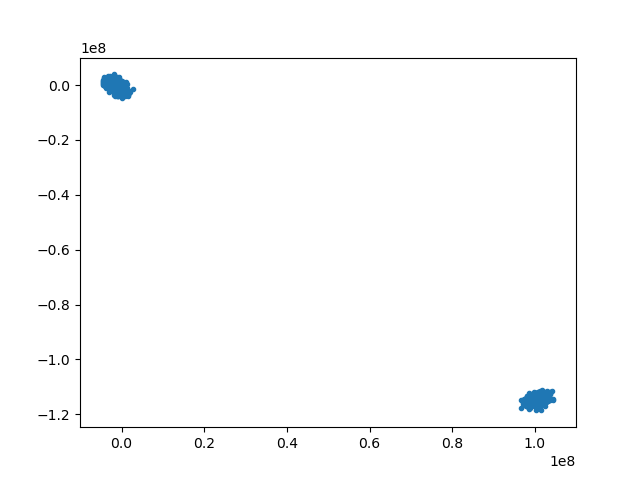

In [136]:
%matplotlib widget
iq=i_rcal.s11[5][:,:,0].reshape((-1,1))
plt.plot(iq.real,iq.imag,'.')
#plt.xlim((0,1e6))
